# 1.0 Assortativity

## 1.1 Introduction

For references please see:

1. https://napsterinblue.github.io/notes/algorithms/graphs/assortativity/
2. https://github.com/ericmjl/nxviz/tree/master/examples
3. http://hal.elte.hu/~nepusz/research/datasets/

In [ ]:
!pip install nxviz=='0.6.3'

In [2]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns

In [3]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1Lk7eMqRSkIftFa8U7iV23VW3ra6qINYE

Downloading...
From: https://drive.google.com/uc?id=1Lk7eMqRSkIftFa8U7iV23VW3ra6qINYE
To: /content/univ_dataset_TSPE.graphml
100% 76.8k/76.8k [00:00<00:00, 71.4MB/s]


In [4]:
# source: http://hal.elte.hu/~nepusz/research/datasets/
G = nx.read_graphml('univ_dataset_TSPE.graphml')

In [5]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 81 nodes and 817 edges


In [6]:
# Just look how the nodes are represented in the Network
G.nodes(data=True)

NodeDataView({'n0': {'group': 2.0, 'id': 'n0'}, 'n1': {'group': 0.0, 'id': 'n1'}, 'n2': {'group': 2.0, 'id': 'n2'}, 'n3': {'group': 2.0, 'id': 'n3'}, 'n4': {'group': 1.0, 'id': 'n4'}, 'n5': {'group': 1.0, 'id': 'n5'}, 'n6': {'group': 1.0, 'id': 'n6'}, 'n7': {'group': 0.0, 'id': 'n7'}, 'n8': {'group': 2.0, 'id': 'n8'}, 'n9': {'group': 1.0, 'id': 'n9'}, 'n10': {'group': 0.0, 'id': 'n10'}, 'n11': {'group': 1.0, 'id': 'n11'}, 'n12': {'group': 1.0, 'id': 'n12'}, 'n13': {'group': 0.0, 'id': 'n13'}, 'n14': {'group': 0.0, 'id': 'n14'}, 'n15': {'group': 1.0, 'id': 'n15'}, 'n16': {'group': 2.0, 'id': 'n16'}, 'n17': {'group': 0.0, 'id': 'n17'}, 'n18': {'group': 0.0, 'id': 'n18'}, 'n19': {'group': 0.0, 'id': 'n19'}, 'n20': {'group': 0.0, 'id': 'n20'}, 'n21': {'group': 1.0, 'id': 'n21'}, 'n22': {'group': 1.0, 'id': 'n22'}, 'n23': {'group': 0.0, 'id': 'n23'}, 'n24': {'group': 0.0, 'id': 'n24'}, 'n25': {'group': 0.0, 'id': 'n25'}, 'n26': {'group': 1.0, 'id': 'n26'}, 'n27': {'group': 1.0, 'id': 'n27'}

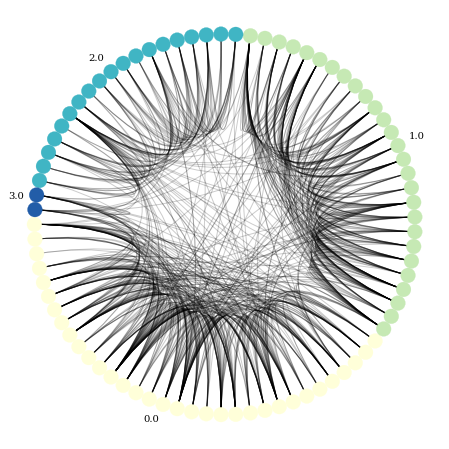

In [7]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="group",
                  node_grouping="group",
                  node_order="group",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# If there is a continuous datatype for the nodes, 
# it will be reflected in self.sm being constructed
# It will then automatically add in a colorbar 
# to the plot and scale the plot axes accordingly
# we need remove the colobar in this case
c.sm.colorbar.remove()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

## 1.2 Measuring discrete assortative mixing

In [8]:
# assortativity of the network based on attribute group
# value was close to 1, in other words, it is a assortative network
# similar groups tend to connect with yourselves members.
nx.attribute_assortativity_coefficient(G,"group")

0.7053802318353712

Measuring discrete assortative mixing (by hands) acoording *M. E. J Newman, Mixing patterns in networks, 2003* [Link](https://arxiv.org/pdf/cond-mat/0209450.pdf)

Property of the mixing matrix:

$
\displaystyle \sum_{ij} e_{ij}=1, \ \ \ \sum_j e_{ij} = a_i, \ \ \ \sum_i e_{ij} = b_j$

To quantify the level of assortative mixing in a network
we define an assortativity coefficient thus:

$\displaystyle r = \frac{\displaystyle \sum_i e_{ii} - \sum_i a_i b_i}{1 - \displaystyle \sum_i a_ib_i} = \displaystyle \frac{Tr(e) - \left \|  e^2\right \|}{1 - \left \|  e^2 \right \|}$

If the network is perfectly disassortative, i.e., every edge connects two vertices of different types, then r is negative and has the value:

$\displaystyle r_{min} = -\frac{ \displaystyle\sum_i a_i b_i}{1 - \displaystyle \sum_i a_ib_i} 
$

In [9]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
# in this case, 4 row and 4 coluns
e = nx.attribute_mixing_matrix(G,'group')
e

array([[0.3880049 , 0.0501836 , 0.01591187, 0.01713586],
       [0.02937576, 0.30599755, 0.00734394, 0.00244798],
       [0.02570379, 0.01591187, 0.11750306, 0.00244798],
       [0.01346389, 0.00367197, 0.00244798, 0.00244798]])

In [10]:
# sum of all values of matrix must be 1.0
np.sum(e)

1.0

In [11]:
# "a" and "b" are the fraction of each type of end of an
# edge that is attached to vertices of specific group
a = np.sum(e, axis=1)
b = np.sum(e, axis=0)

display(a)
display(b)

array([0.47123623, 0.34516524, 0.16156671, 0.02203182])

array([0.45654835, 0.37576499, 0.14320685, 0.0244798 ])

In [12]:
# trace of mixing matrix
tr_e = np.trace(e)
tr_e

0.813953488372093

In [13]:
# sum of squared matrix
multi_e = np.sum(np.matmul(e,e))

In [14]:
# assortativity metric
r = (tr_e - multi_e)/(1 - multi_e)
r

0.7053802318353712

In [15]:
# check if values are the same
assert (r == nx.attribute_assortativity_coefficient(G,"group"))

## 1.3 Degree Assortativity

In [16]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


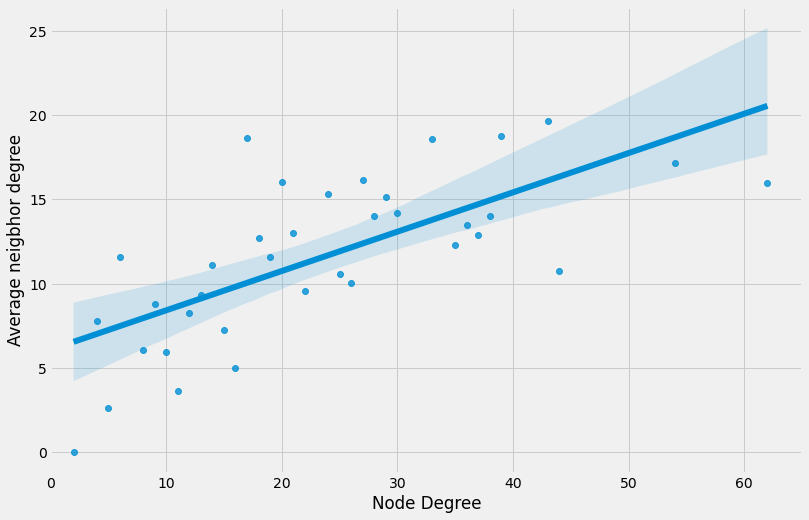

In [17]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

In [18]:
nx.degree_assortativity_coefficient(G)

0.08045070618608922